### Vertical Index calcultation from preprocessed data tables

In this code we will load the data and calculate the vertical index as
VI=V-H/V+H

Names of files used in session are the ones used to load the correspoding preprocessed data

Lets load the data

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../../')
import commons as cm
from data_curation import Normalization
from pandasql import sqldf
from pyeyemo.gaze import gaze_commons as gm
from pyeyemo.gaze.eye import Eye
from itertools import compress
from os import listdir
from os.path import isfile, join,isdir
from mungling import DataMungling 

nm=Normalization()
dm=DataMungling()

## Falta añadir tiempo inicial de ventana desde aparición del asset

In [2]:
session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS")
# session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS")

data_path=Path(r"data/pilot/") #folder whre csvs sill be saved

sessions=[]
df_list=[]
subjects=[]

window_analysis=6 # total window of analysis
window_onset=0 #window onset 
annotation_list=['Asset'] # list of names that have assets

onlyfiles = [f for f in listdir(session_location) if isdir(join(session_location, f))]
for dir in onlyfiles:
 print (dir,flush=True)

ES0001_S003_PC_EM
ES0001_S004_PC_EM
ES0001_S005_PC_EM
ES0001_S006_PC_EM
ES0001_S008_PC_EM
ES0001_S009_PC_EM
ES0001_S010_PC_EM
ES0001_S011_PC_EM
ES0001_S012_PC_EM
ES0001_S013_PC_EM
ES0001_S015_PC_EM
ES0001_S017_PC_EM
ES0001_S018_PC_EM
ES0001_S019_PC_EM
ES0001_S020_PC_EM
ES0001_S022_PC_EM
ES0001_S023_PC_EM
ES0001_S024_PC_EM
ES0001_S025_PC_EM
ES0001_S026_PC_EM
ES0001_S027_PC_EM
ES0001_S028_PC_EM
ES0001_S029_PC_EM
ES0001_S030_PC_EM
ES0001_S031_PC_EM
Excluded
Resguardo_Excell


In [3]:
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()
session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
# session_loc_list=[session_location.joinpath(session,'01 Processing_data') for session in sessions ]

for session, recording_location in zip(sessions,session_loc_list):
    data_paths=gm.extract_session_path_pupil_labs(recording_location=recording_location,
                                       subject=session)
    print(session)
    annotations_csv = data_paths['annotations']
    fixations_csv = data_paths['annotations']
    fixations_surf_csv = data_paths['fixations_surf']
    exported_gaze_csv=data_path.joinpath(f'{session}_saccades.csv') 
    gaze_pd_frame = pd.read_csv(exported_gaze_csv)
    print(f'Analiysing session: {session}, annotations: {annotations_csv}, gaze: {exported_gaze_csv}')

    # Now isntantitate an eye object and do the operations
    subject=Eye(session)
    subject.load_annotations(annotation_dir=annotations_csv)
    subject.load_fixations(fixations_dir=exported_gaze_csv)
    subject.cut_data_of_interest()
    subject.labels_to_analyse(annotation_list)
    subject.filter_labels(subject.annotations['label'])
    subject.vertical_index(window_analysis=window_analysis,
                           window_onset=window_onset,
                           screen_normalization=False)

    subject.vertical_index_df.index=[subject.name]
    df_list.append(subject.vertical_index_df)
    subjects.append(subject)

vertical_index_concat_df=pd.concat(df_list)
vertical_index_concat_df.to_csv(data_path.joinpath('vi_table.csv'))
vi=dm.refactor_df_to_categorical(df=vertical_index_concat_df,col_names=['session','asset','vi'])

data_matrix=pd.read_csv(data_path.joinpath('number_fixations.csv'),index_col=False)
if data_matrix.shape[0] == vi.shape[0]:
    print('annotations are correct..saving csv')
    data_matrix_final=data_matrix.merge(vi,on=['session','asset'])
    data_matrix_final.to_csv(data_path.joinpath('data_matrix.csv'),index=False)
else:
    raise Exception('Annotation and Data do not match')

if data_matrix.shape[0] != data_matrix_final.shape[0]:
    raise Exception('Final data matrix f different length')

['002']
ES0001_S003_PC_EM
Analiysing session: ES0001_S003_PC_EM, annotations: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS\ES0001_S003_PC_EM\01 Processing_data\pupil_labs\002\exports\002\annotations.csv, gaze: data\pilot\ES0001_S003_PC_EM_saccades.csv
['005', 'ES0001_S004_Script.txt']
ES0001_S004_PC_EM
Analiysing session: ES0001_S004_PC_EM, annotations: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS\ES0001_S004_PC_EM\01 Processing_data\pupil_labs\005\exports\002\annotations.csv, gaze: data\pilot\ES0001_S004_PC_EM_saccades.csv
['006', 'ES0001_S005_Script.txt']
ES0001_S005_PC_EM
Analiysing session: ES0001_S005_PC_EM, annotations: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS\ES0001_S005_PC_EM\01 Processing_data\pupil_labs\006\exports\001\annotations.csv, gaze: data\pilot\ES00

Exception: Annotation and Data do not match

In [8]:
a=np.unique(data_matrix['asset'])

In [12]:
s=subject.annotation_list

In [6]:
df = vertical_index_concat_df.reindex(sorted(vertical_index_concat_df.columns), axis=1)
df

,Asset0001.tif,Asset0002.tif,Asset0003.tif,Asset0004.tif,Asset0005.tif,Asset0006.tif,Asset0007.tif,Asset0008.tif,Asset0009.tif,Asset0010.tif,...,Asset0042.tif,Asset0043.tif,Asset0044.tif,Asset0045.tif,Asset0046.tif,Asset0047.tif,Asset0048.tif,Asset0049.tif,Asset0050.tif,index
0,0.333333,-0.066667,0.000000,-0.333333,0.000000,-0.375000,0.000000,0.222222,0.142857,0.250000,...,0.692308,0.076923,0.058824,0.200000,-0.125000,0.125000,0.052632,0.200000,0.538462,ES0001_S003_PC_EM
1,0.238095,0.083333,0.100000,0.571429,0.400000,0.333333,0.375000,0.888889,-0.090909,0.047619,...,0.130435,0.100000,-0.083333,0.363636,0.411765,0.666667,0.238095,0.263158,0.565217,ES0001_S004_PC_EM
2,0.222222,0.222222,0.222222,0.166667,0.222222,0.157895,-0.166667,0.500000,0.529412,-0.411765,...,0.666667,0.052632,0.294118,0.333333,-0.500000,0.222222,0.285714,0.058824,0.125000,ES0001_S005_PC_EM
3,0.181818,-0.058824,0.047619,0.111111,0.333333,0.200000,0.052632,0.294118,0.578947,-0.052632,...,0.263158,-0.263158,0.066667,0.473684,0.047619,0.684211,0.428571,0.000000,0.142857,ES0001_S006_PC_EM
4,0.047619,0.500000,0.100000,0.157895,0.300000,0.238095,0.416667,0.300000,-0.181818,0.545455,...,0.454545,-0.142857,-0.473684,0.500000,-0.090909,-0.043478,-0.047619,-0.263158,0.700000,ES0001_S008_PC_EM
5,-0.157895,0.000000,0.571429,0.333333,0.411765,-0.076923,0.500000,0.600000,0.250000,-0.294118,...,0.400000,0.250000,0.333333,0.263158,-0.230769,0.058824,-0.058824,0.157895,0.294118,ES0001_S009_PC_EM
6,0.222222,-0.444444,-0.100000,0.300000,0.000000,0.250000,0.200000,-0.125000,-0.294118,-0.111111,...,0.529412,0.100000,-0.368421,0.125000,0.058824,0.125000,0.000000,0.411765,0.000000,ES0001_S010_PC_EM
7,0.142857,0.176471,0.222222,0.368421,0.333333,0.473684,0.111111,0.600000,0.545455,0.100000,...,0.473684,0.428571,0.200000,0.363636,0.142857,0.000000,0.000000,0.157895,0.125000,ES0001_S011_PC_EM
8,0.363636,0.000000,0.058824,0.052632,0.200000,0.000000,-0.200000,0.200000,0.500000,0.066667,...,0.777778,0.294118,0.000000,0.294118,0.000000,-0.600000,0.200000,0.125000,0.222222,ES0001_S012_PC_EM
9,0.000000,-0.157895,0.043478,0.272727,0.300000,0.090909,0.700000,0.818182,0.304348,0.142857,...,0.777778,0.250000,-0.111111,0.272727,-0.157895,-0.684211,0.565217,-0.052632,0.454545,ES0001_S013_PC_EM


In [5]:
data_matrix_final

,session,asset,fixation_on_surface,fixation_off_surface,mean_distance,mean_speed,average_fixation,total_fixation,vi
0,ES0001_S003_PC_EM,Asset0032.tif,14,0.0,0.067511,0.165742,359.577286,5034.0820,0.168831
1,ES0001_S003_PC_EM,Asset0044.tif,20,0.0,0.093012,0.332115,268.204275,5364.0855,-0.28
2,ES0001_S003_PC_EM,Asset0049.tif,17,0.0,0.115601,0.344340,295.992559,5031.8735,0.015385
3,ES0001_S003_PC_EM,Asset0005.tif,18,0.0,0.107154,0.316517,298.256222,5368.6120,-0.174312
4,ES0001_S003_PC_EM,Asset0037.tif,16,0.0,0.086334,0.234513,351.848312,5629.5730,-0.160622
...,...,...,...,...,...,...,...,...,...
1120,ES0001_S031_PC_EM,Asset0024.tif,21,0.0,0.099882,0.385485,236.657381,4969.8050,0.410138
1121,ES0001_S031_PC_EM,Asset0012.tif,18,0.0,0.095201,0.286910,298.330417,5369.9475,0.187817
1122,ES0001_S031_PC_EM,Asset0016.tif,24,0.0,0.098501,0.433726,222.915646,5349.9755,0.058824
1123,ES0001_S031_PC_EM,Asset0040.tif,23,0.0,0.089576,0.379284,219.816587,5055.7815,0.026616


merge with main tables

In [6]:

if len(np.unique(subject.annotations['label']))==len(np.unique(subject.fixations['asset'])):
    print('correct')

correct


In [7]:
np.unique(subject.annotations['label'])

array(['Obj0218_Asset0046', 'Obj0219_Asset0047', 'Obj0220_Asset0048',
       'Obj0221_Asset0049', 'Obj0222_Asset0050', 'Obj0223_Asset0046',
       'Obj0224_Asset0047', 'Obj0225_Asset0048', 'Obj0226_Asset0049',
       'Obj0227_Asset0050', 'Obj0228_Asset0048', 'Obj0229_Asset0077',
       'Obj0230_Asset0078', 'Obj0231_Asset0079', 'end_of_stimulation'],
      dtype=object)

<AxesSubplot: >

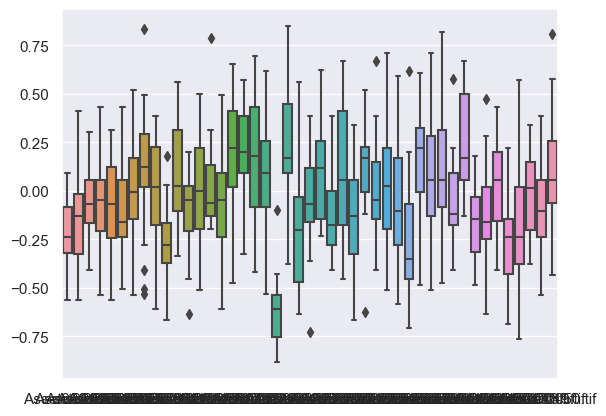

In [6]:

import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=df)

### change data matrix to categorical data

In [9]:
for col in ['session', 'asset']:
    data_matrix_final[col]=data_matrix_final[col].astype('category')

In [10]:
data_matrix_final.dtypes

session                 category
asset                   category
fixation_on_surface      float64
fixation_off_surface     float64
mean_distance            float64
mean_speed               float64
average_fixation         float64
total_fixation           float64
vi                        object
dtype: object

<AxesSubplot: xlabel='asset', ylabel='vi'>

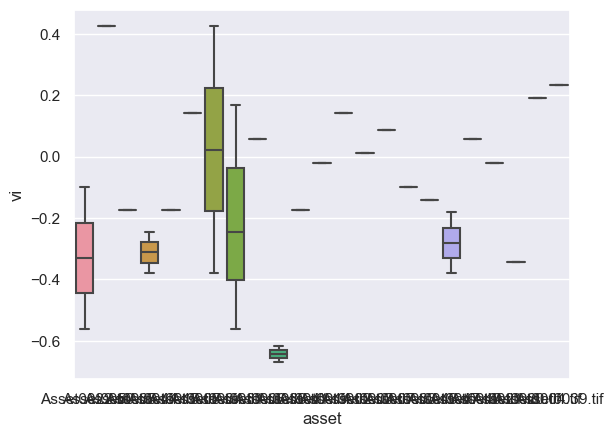

In [7]:
    
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=data_matrix_final.query('fixation_on_surface > 26'),
            x='asset',y='vi')

<AxesSubplot: xlabel='asset', ylabel='mean_distance'>

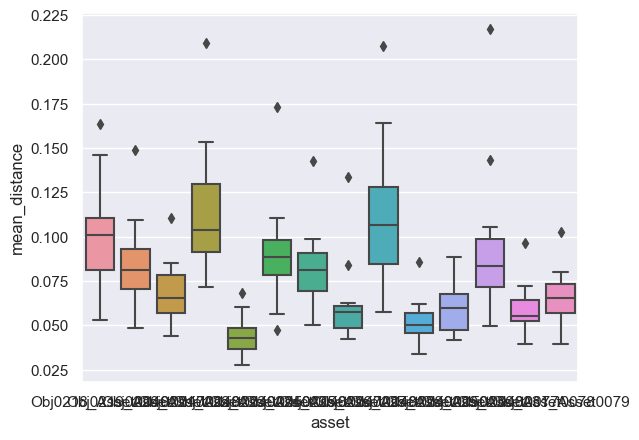

In [13]:
    
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=data_matrix_final.query('fixation_on_surface > 26')
            ,x='asset',y='mean_distance')

<AxesSubplot: >

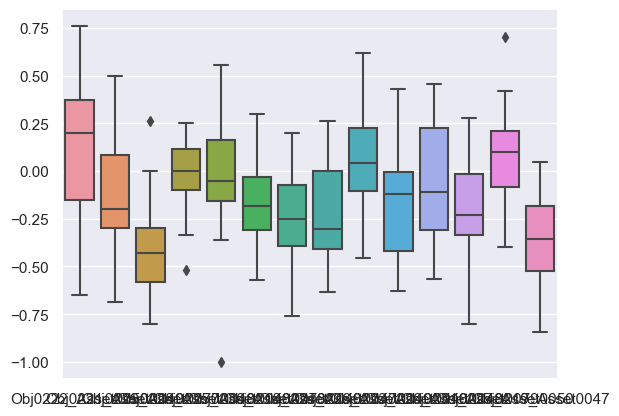

In [14]:
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=vertical_index_concat_df)

<AxesSubplot: >

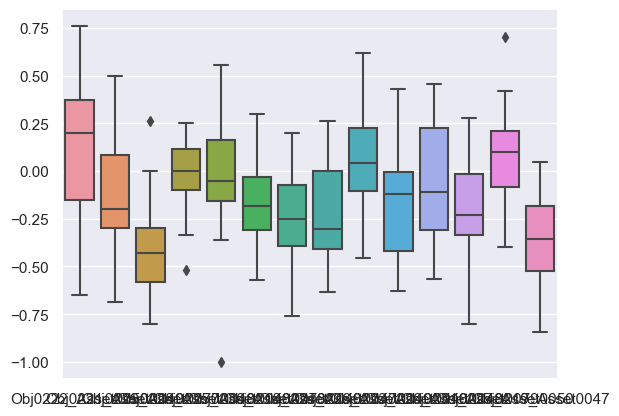

In [14]:
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=vertical_index_concat_df)

In [15]:
%qt
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
% matplotlib qt

sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=vertical_index_concat_df)


UsageError: Line magic function `%qt` not found.


In [16]:
subject.annotation_list.values.tolist()

['Obj0223_Asset0046',
 'Obj0219_Asset0047',
 'Obj0230_Asset0078',
 'Obj0224_Asset0047',
 'Obj0226_Asset0049',
 'Obj0227_Asset0050',
 'Obj0222_Asset0050',
 'Obj0228_Asset0048',
 'Obj0229_Asset0077',
 'Obj0231_Asset0079',
 'Obj0220_Asset0048',
 'Obj0225_Asset0048',
 'Obj0221_Asset0049',
 'Obj0218_Asset0046']

In [17]:
vertical_index_concat_df.columns

Index(['index', 'Obj0222_Asset0050', 'Obj0221_Asset0049', 'Obj0229_Asset0077',
       'Obj0228_Asset0048', 'Obj0225_Asset0048', 'Obj0230_Asset0078',
       'Obj0218_Asset0046', 'Obj0224_Asset0047', 'Obj0226_Asset0049',
       'Obj0223_Asset0046', 'Obj0220_Asset0048', 'Obj0231_Asset0079',
       'Obj0227_Asset0050', 'Obj0219_Asset0047'],
      dtype='object')

In [18]:

# df = vertical_index_concat_df.groupby(by=[vertical_index_concat_df.index].append(subject.annotation_list.values.tolist()),level=0).filter(lambda x: True)
# df = vertical_index_concat_df.groupby(by=['Obj0222_Asset0050']).filter(lambda x: True)
vertical_index_concat_df.groupby('Obj0222_Asset0050').count()

,index,Obj0221_Asset0049,Obj0229_Asset0077,Obj0228_Asset0048,Obj0225_Asset0048,Obj0230_Asset0078,Obj0218_Asset0046,Obj0224_Asset0047,Obj0226_Asset0049,Obj0223_Asset0046,Obj0220_Asset0048,Obj0231_Asset0079,Obj0227_Asset0050,Obj0219_Asset0047
Obj0222_Asset0050,,,,,,,,,,,,,,
-0.652174,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-0.440000,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-0.411765,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-0.222222,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-0.157895,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-0.142857,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-0.037037,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.066667,2,2,2,2,2,2,2,2,2,2,2,2,2,2
0.200000,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
fixations=subject.fixations

In [20]:
subject.annotation_list[0]

'Obj0223_Asset0046'

In [21]:
vertical_index_df

NameError: name 'vertical_index_df' is not defined

In [ ]:
# Calculate Vertical Index
data_dict=dict([(key,[None]) for key in subject.annotation_list])# dict with empty keys 
vertical_index_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
data_list=[]
window_analysis=2  #window of analysis in seconds
for asset in subject.annotation_list:
    print(type(asset))
    print(f'asset == {asset}')
    aux_df=fixations.query(f"asset == '{asset}'") #break table by asset name
    display(aux_df)
    time_0=aux_df['start_timestamp'].values[0]
    print(time_0)
    segmented_df=cm.filter_rows_by_temporal_values(
            dataframe=aux_df,
            time_column='start_timestamp',
            ini_value=time_0,
            end_value=time_0+window_analysis
            )   
    display(segmented_df)
    verticality=segmented_df['verticality'].values
    vi=gm.compute_vertical_index(verticality)
    print(vi) 
    data_dict[asset]=[vi]
vertical_index_df=pd.DataFrame(data_dict)
# return vertical_index_df


<class 'str'>
asset == Obj0219_Asset0047


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
2,123276.482084,320,40,123276.467825,114.0065,1.427367,0.442470,0.442724,0.442470,0.442724,True,Obj0219_Asset0047,0.128752,0.297318,1.704479,97.659467,1
3,123276.585744,322,41,123276.585862,210.1620,0.887989,0.450007,0.469052,0.450007,0.469052,True,Obj0219_Asset0047,0.027386,0.264189,1.291969,74.024397,1
4,123276.798716,326,42,123276.808130,294.2615,1.250420,0.439702,0.379544,0.439702,0.379544,True,Obj0219_Asset0047,0.090099,0.423057,-1.685428,263.432105,1
5,123277.283115,335,43,123277.272034,209.7580,1.468425,0.474682,0.358029,0.474682,0.358029,True,Obj0219_Asset0047,0.041067,0.084780,-0.551424,328.405747,0
6,123277.491146,339,44,123277.485809,456.1340,1.434740,0.478344,0.349013,0.478344,0.349013,True,Obj0219_Asset0047,0.009731,0.046777,-1.184977,292.105846,1
7,123277.963271,348,45,123277.953816,242.2825,1.454977,0.392673,0.335274,0.392673,0.335274,True,Obj0219_Asset0047,0.086765,0.183776,-2.982574,189.111090,0
8,123278.286690,354,46,123278.264065,295.4985,1.438765,0.485141,0.346468,0.485141,0.346468,True,Obj0219_Asset0047,0.093143,0.287994,0.120468,6.902294,0
9,123278.556518,358,47,123278.578835,295.1765,0.997707,0.572042,0.340312,0.572042,0.340312,True,Obj0219_Asset0047,0.087119,0.322869,-0.070722,355.947916,0
10,123278.870762,363,48,123278.882935,261.1625,1.430996,0.625823,0.338162,0.625823,0.338162,True,Obj0219_Asset0047,0.053824,0.171282,-0.039949,357.711070,0
11,123279.550271,375,49,123279.525822,380.3415,1.185280,0.343185,0.353619,0.343185,0.353619,True,Obj0219_Asset0047,0.283061,0.416566,3.086960,176.869783,0


123276.467825


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
2,123276.482084,320,40,123276.467825,114.0065,1.427367,0.442470,0.442724,0.442470,0.442724,True,Obj0219_Asset0047,0.128752,0.297318,1.704479,97.659467,1
3,123276.585744,322,41,123276.585862,210.1620,0.887989,0.450007,0.469052,0.450007,0.469052,True,Obj0219_Asset0047,0.027386,0.264189,1.291969,74.024397,1
4,123276.798716,326,42,123276.808130,294.2615,1.250420,0.439702,0.379544,0.439702,0.379544,True,Obj0219_Asset0047,0.090099,0.423057,-1.685428,263.432105,1
5,123277.283115,335,43,123277.272034,209.7580,1.468425,0.474682,0.358029,0.474682,0.358029,True,Obj0219_Asset0047,0.041067,0.084780,-0.551424,328.405747,0
6,123277.491146,339,44,123277.485809,456.1340,1.434740,0.478344,0.349013,0.478344,0.349013,True,Obj0219_Asset0047,0.009731,0.046777,-1.184977,292.105846,1
7,123277.963271,348,45,123277.953816,242.2825,1.454977,0.392673,0.335274,0.392673,0.335274,True,Obj0219_Asset0047,0.086765,0.183776,-2.982574,189.111090,0
8,123278.286690,354,46,123278.264065,295.4985,1.438765,0.485141,0.346468,0.485141,0.346468,True,Obj0219_Asset0047,0.093143,0.287994,0.120468,6.902294,0


0.14285714285714285
<class 'str'>
asset == Obj0230_Asset0078


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
42,123300.012773,771,110,123300.026541,150.0015,1.426996,0.384382,0.247164,0.384382,0.247164,True,Obj0230_Asset0078,0.051166,0.194404,-2.866816,195.743547,0
43,123300.174547,774,111,123300.180635,230.0305,1.360039,0.369084,0.261992,0.369084,0.261992,True,Obj0230_Asset0078,0.021304,0.131693,2.371770,135.892431,0
44,123300.600159,782,112,123300.601374,211.2285,1.040585,0.514658,0.254596,0.514658,0.254596,True,Obj0230_Asset0078,0.145762,0.342475,-0.050767,357.091256,0
45,123300.809857,786,113,123300.820717,110.1045,1.497402,0.482255,0.321989,0.482255,0.321989,True,Obj0230_Asset0078,0.074779,0.356602,2.018970,115.678434,1
46,123300.955993,789,114,123300.934673,286.0400,1.147240,0.487692,0.331257,0.487692,0.331257,True,Obj0230_Asset0078,0.010744,0.073524,1.040289,59.604195,1
47,123301.226085,794,115,123301.224792,375.9480,1.389371,0.519946,0.311108,0.519946,0.311108,True,Obj0230_Asset0078,0.038031,0.140807,-0.558387,328.006782,0
48,123301.867855,807,116,123301.866816,158.1285,1.432956,0.459759,0.317586,0.459759,0.317586,True,Obj0230_Asset0078,0.060534,0.094324,3.034370,173.856577,0
49,123302.017999,810,117,123302.028979,269.6095,0.875427,0.455018,0.304086,0.455018,0.304086,True,Obj0230_Asset0078,0.014309,0.095299,-1.908580,250.646398,1
50,123302.327890,816,118,123302.306807,499.9360,1.482208,0.407562,0.266766,0.407562,0.266766,True,Obj0230_Asset0078,0.060372,0.194817,-2.475196,218.181695,0
51,123302.896133,827,119,123302.900970,397.8660,1.294875,0.465241,0.208585,0.465241,0.208585,True,Obj0230_Asset0078,0.081927,0.144176,-0.789734,314.751565,1


123300.026541


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
42,123300.012773,771,110,123300.026541,150.0015,1.426996,0.384382,0.247164,0.384382,0.247164,True,Obj0230_Asset0078,0.051166,0.194404,-2.866816,195.743547,0
43,123300.174547,774,111,123300.180635,230.0305,1.360039,0.369084,0.261992,0.369084,0.261992,True,Obj0230_Asset0078,0.021304,0.131693,2.371770,135.892431,0
44,123300.600159,782,112,123300.601374,211.2285,1.040585,0.514658,0.254596,0.514658,0.254596,True,Obj0230_Asset0078,0.145762,0.342475,-0.050767,357.091256,0
45,123300.809857,786,113,123300.820717,110.1045,1.497402,0.482255,0.321989,0.482255,0.321989,True,Obj0230_Asset0078,0.074779,0.356602,2.018970,115.678434,1
46,123300.955993,789,114,123300.934673,286.0400,1.147240,0.487692,0.331257,0.487692,0.331257,True,Obj0230_Asset0078,0.010744,0.073524,1.040289,59.604195,1
47,123301.226085,794,115,123301.224792,375.9480,1.389371,0.519946,0.311108,0.519946,0.311108,True,Obj0230_Asset0078,0.038031,0.140807,-0.558387,328.006782,0
48,123301.867855,807,116,123301.866816,158.1285,1.432956,0.459759,0.317586,0.459759,0.317586,True,Obj0230_Asset0078,0.060534,0.094324,3.034370,173.856577,0


-0.42857142857142855
<class 'str'>
asset == Obj0218_Asset0046


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
76,123321.243688,1199,170,123321.245196,238.2350,1.248473,0.384162,0.507422,0.384162,0.507422,True,Obj0218_Asset0046,0.263682,0.565473,0.763506,43.745663,0
77,123321.547889,1205,171,123321.544904,366.3875,1.347222,0.257418,0.506439,0.257418,0.506439,True,Obj0218_Asset0046,0.126747,0.416657,-3.133833,180.444582,0
78,123321.942874,1213,172,123321.940395,193.3850,1.401873,0.477788,0.470359,0.477788,0.470359,True,Obj0218_Asset0046,0.223304,0.565348,-0.162285,350.701777,0
79,123322.292106,1220,173,123322.281682,154.1675,1.163971,0.485516,0.457604,0.485516,0.457604,True,Obj0218_Asset0046,0.014913,0.042702,-1.026064,301.210887,1
80,123322.480416,1224,174,123322.463408,436.0875,1.426186,0.455454,0.294458,0.455454,0.294458,True,Obj0218_Asset0046,0.165893,0.880955,-1.753014,259.559689,1
81,123323.090499,1236,175,123323.089606,193.8225,1.281863,0.487431,0.488770,0.487431,0.488770,True,Obj0218_Asset0046,0.196925,0.322784,1.407695,80.654996,1
82,123323.286200,1240,176,123323.303389,338.1585,1.494125,0.623983,0.461547,0.623983,0.461547,True,Obj0218_Asset0046,0.139240,0.711492,-0.196776,348.725561,0
83,123323.649253,1247,177,123323.645495,213.8275,0.723204,0.648870,0.468487,0.648870,0.468487,True,Obj0218_Asset0046,0.025836,0.071164,0.271950,15.581579,0
84,123323.895583,1252,178,123323.891390,142.0580,1.460007,0.345976,0.502799,0.345976,0.502799,True,Obj0218_Asset0046,0.304831,1.237492,3.028795,173.537145,0
85,123324.050946,1255,179,123324.037412,325.9315,1.049534,0.347438,0.483024,0.347438,0.483024,True,Obj0218_Asset0046,0.019828,0.127625,-1.496986,274.229018,1


123321.2451965


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
76,123321.243688,1199,170,123321.245196,238.2350,1.248473,0.384162,0.507422,0.384162,0.507422,True,Obj0218_Asset0046,0.263682,0.565473,0.763506,43.745663,0
77,123321.547889,1205,171,123321.544904,366.3875,1.347222,0.257418,0.506439,0.257418,0.506439,True,Obj0218_Asset0046,0.126747,0.416657,-3.133833,180.444582,0
78,123321.942874,1213,172,123321.940395,193.3850,1.401873,0.477788,0.470359,0.477788,0.470359,True,Obj0218_Asset0046,0.223304,0.565348,-0.162285,350.701777,0
79,123322.292106,1220,173,123322.281682,154.1675,1.163971,0.485516,0.457604,0.485516,0.457604,True,Obj0218_Asset0046,0.014913,0.042702,-1.026064,301.210887,1
80,123322.480416,1224,174,123322.463408,436.0875,1.426186,0.455454,0.294458,0.455454,0.294458,True,Obj0218_Asset0046,0.165893,0.880955,-1.753014,259.559689,1
81,123323.090499,1236,175,123323.089606,193.8225,1.281863,0.487431,0.488770,0.487431,0.488770,True,Obj0218_Asset0046,0.196925,0.322784,1.407695,80.654996,1


0.0
<class 'str'>
asset == Obj0228_Asset0048


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
117,123342.902283,1655,229,123342.882242,308.0915,1.334315,0.507537,0.307027,0.507537,0.307027,True,Obj0228_Asset0048,0.085618,0.410077,-0.077568,355.555691,0
118,123343.225651,1661,230,123343.202060,282.0635,1.003549,0.557205,0.255378,0.557205,0.255378,True,Obj0228_Asset0048,0.071656,0.221593,-0.804956,313.879390,1
119,123343.476802,1666,231,123343.500418,113.8350,1.396948,0.430099,0.218747,0.430099,0.218747,True,Obj0228_Asset0048,0.132280,0.526694,-2.861007,196.076359,0
120,123343.684005,1670,232,123343.682077,100.6455,1.493880,0.436927,0.160455,0.436927,0.160455,True,Obj0228_Asset0048,0.058690,0.283249,-1.454192,276.680925,1
121,123343.787563,1672,233,123343.786526,141.5310,1.436129,0.450750,0.161819,0.450750,0.161819,True,Obj0228_Asset0048,0.013891,0.134136,0.098312,5.632861,0
122,123344.038464,1677,234,123344.030065,176.6415,1.269106,0.513478,0.159055,0.513478,0.159055,True,Obj0228_Asset0048,0.062788,0.250252,-0.044028,357.477369,0
123,123344.199931,1680,235,123344.210388,499.8155,1.134553,0.491599,0.192207,0.491599,0.192207,True,Obj0228_Asset0048,0.039721,0.246000,2.154146,123.423494,1
124,123344.712615,1690,236,123344.714172,384.1130,0.658325,0.493693,0.183882,0.493693,0.183882,True,Obj0228_Asset0048,0.008585,0.016744,-1.324311,284.122574,1
125,123345.134204,1698,237,123345.114330,206.2730,1.468798,0.476573,0.272887,0.476573,0.272887,True,Obj0228_Asset0048,0.090636,0.214988,1.760827,100.887955,1
126,123345.439783,1704,238,123345.420351,375.8710,1.491918,0.567829,0.231627,0.567829,0.231627,True,Obj0228_Asset0048,0.100150,0.327740,-0.424630,335.670502,0


123342.8822425


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
117,123342.902283,1655,229,123342.882242,308.0915,1.334315,0.507537,0.307027,0.507537,0.307027,True,Obj0228_Asset0048,0.085618,0.410077,-0.077568,355.555691,0
118,123343.225651,1661,230,123343.202060,282.0635,1.003549,0.557205,0.255378,0.557205,0.255378,True,Obj0228_Asset0048,0.071656,0.221593,-0.804956,313.879390,1
119,123343.476802,1666,231,123343.500418,113.8350,1.396948,0.430099,0.218747,0.430099,0.218747,True,Obj0228_Asset0048,0.132280,0.526694,-2.861007,196.076359,0
120,123343.684005,1670,232,123343.682077,100.6455,1.493880,0.436927,0.160455,0.436927,0.160455,True,Obj0228_Asset0048,0.058690,0.283249,-1.454192,276.680925,1
121,123343.787563,1672,233,123343.786526,141.5310,1.436129,0.450750,0.161819,0.450750,0.161819,True,Obj0228_Asset0048,0.013891,0.134136,0.098312,5.632861,0
122,123344.038464,1677,234,123344.030065,176.6415,1.269106,0.513478,0.159055,0.513478,0.159055,True,Obj0228_Asset0048,0.062788,0.250252,-0.044028,357.477369,0
123,123344.199931,1680,235,123344.210388,499.8155,1.134553,0.491599,0.192207,0.491599,0.192207,True,Obj0228_Asset0048,0.039721,0.246000,2.154146,123.423494,1
124,123344.712615,1690,236,123344.714172,384.1130,0.658325,0.493693,0.183882,0.493693,0.183882,True,Obj0228_Asset0048,0.008585,0.016744,-1.324311,284.122574,1


0.0
<class 'str'>
asset == Obj0221_Asset0049


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
159,123365.956399,2124,303,123365.944827,178.0870,1.453867,0.520709,0.635491,0.520709,0.635491,True,Obj0221_Asset0049,0.044026,0.300008,-1.901187,251.069991,1
160,123366.161045,2128,304,123366.142925,169.9885,1.499619,0.461691,0.562358,0.461691,0.562358,True,Obj0221_Asset0049,0.093976,0.459213,-2.249792,231.096414,1
161,123366.319852,2131,305,123366.316931,198.3460,1.365937,0.454510,0.557842,0.454510,0.557842,True,Obj0221_Asset0049,0.008483,0.053417,-2.580177,212.166776,0
162,123366.721001,2139,306,123366.715028,205.8260,1.311482,0.452290,0.543898,0.452290,0.543898,True,Obj0221_Asset0049,0.014119,0.035198,-1.728656,260.955316,1
163,123366.911767,2143,307,123366.935439,143.5635,1.492263,0.419194,0.479237,0.419194,0.479237,True,Obj0221_Asset0049,0.072639,0.380774,-2.043883,242.894150,1
164,123367.067504,2146,308,123367.083165,125.6780,0.676147,0.419207,0.472396,0.419207,0.472396,True,Obj0221_Asset0049,0.006842,0.043931,-1.568797,270.114556,1
165,123367.219469,2149,309,123367.232902,178.6895,1.480110,0.666332,0.399916,0.666332,0.399916,True,Obj0221_Asset0049,0.257535,1.694697,-0.285290,343.654061,0
166,123367.413335,2153,310,123367.415493,111.8935,1.041206,0.696831,0.389322,0.696831,0.389322,True,Obj0221_Asset0049,0.032286,0.166539,-0.334322,340.844789,0
167,123367.569236,2156,311,123367.583227,499.9090,1.454645,0.445042,0.234632,0.445042,0.234632,True,Obj0221_Asset0049,0.295511,1.895506,-2.590677,211.565121,0
168,123368.065347,2166,312,123368.087047,408.3185,1.446458,0.440564,0.232606,0.440564,0.232606,True,Obj0221_Asset0049,0.004915,0.009907,-2.716741,204.342198,0


123365.944827


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
159,123365.956399,2124,303,123365.944827,178.0870,1.453867,0.520709,0.635491,0.520709,0.635491,True,Obj0221_Asset0049,0.044026,0.300008,-1.901187,251.069991,1
160,123366.161045,2128,304,123366.142925,169.9885,1.499619,0.461691,0.562358,0.461691,0.562358,True,Obj0221_Asset0049,0.093976,0.459213,-2.249792,231.096414,1
161,123366.319852,2131,305,123366.316931,198.3460,1.365937,0.454510,0.557842,0.454510,0.557842,True,Obj0221_Asset0049,0.008483,0.053417,-2.580177,212.166776,0
162,123366.721001,2139,306,123366.715028,205.8260,1.311482,0.452290,0.543898,0.452290,0.543898,True,Obj0221_Asset0049,0.014119,0.035198,-1.728656,260.955316,1
163,123366.911767,2143,307,123366.935439,143.5635,1.492263,0.419194,0.479237,0.419194,0.479237,True,Obj0221_Asset0049,0.072639,0.380774,-2.043883,242.894150,1
164,123367.067504,2146,308,123367.083165,125.6780,0.676147,0.419207,0.472396,0.419207,0.472396,True,Obj0221_Asset0049,0.006842,0.043931,-1.568797,270.114556,1
165,123367.219469,2149,309,123367.232902,178.6895,1.480110,0.666332,0.399916,0.666332,0.399916,True,Obj0221_Asset0049,0.257535,1.694697,-0.285290,343.654061,0
166,123367.413335,2153,310,123367.415493,111.8935,1.041206,0.696831,0.389322,0.696831,0.389322,True,Obj0221_Asset0049,0.032286,0.166539,-0.334322,340.844789,0
167,123367.569236,2156,311,123367.583227,499.9090,1.454645,0.445042,0.234632,0.445042,0.234632,True,Obj0221_Asset0049,0.295511,1.895506,-2.590677,211.565121,0


0.1111111111111111
<class 'str'>
asset == Obj0225_Asset0048


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
202,123388.393880,2575,370,123388.417696,154.6200,1.164825,0.491166,0.294811,0.491166,0.294811,True,Obj0225_Asset0048,0.032206,0.299815,0.422172,24.188657,0
203,123388.609369,2579,371,123388.583624,198.0175,1.156190,0.562110,0.277565,0.562110,0.277565,True,Obj0225_Asset0048,0.073011,0.338814,-0.238479,346.336160,0
204,123388.982256,2586,372,123388.955958,100.1440,1.457087,0.557959,0.303425,0.557959,0.303425,True,Obj0225_Asset0048,0.026191,0.070239,1.729947,99.118634,1
205,123389.036883,2587,373,123389.059571,134.3650,1.136678,0.534983,0.301920,0.534983,0.301920,True,Obj0225_Asset0048,0.023025,0.421498,-3.076208,183.746265,0
206,123389.201656,2590,374,123389.205643,250.0220,1.305342,0.483793,0.301531,0.483793,0.301531,True,Obj0225_Asset0048,0.051191,0.310678,-3.133993,180.435435,0
207,123389.735211,2600,375,123389.737785,258.3350,1.291030,0.442344,0.204236,0.442344,0.204236,True,Obj0225_Asset0048,0.105757,0.198211,-1.973531,246.925001,1
208,123390.010340,2605,376,123390.023240,254.5290,1.464026,0.542736,0.189358,0.542736,0.189358,True,Obj0225_Asset0048,0.101489,0.368878,-0.147131,351.569991,0
209,123390.285787,2610,377,123390.281711,308.0000,0.945596,0.556440,0.203939,0.556440,0.203939,True,Obj0225_Asset0048,0.020010,0.072646,0.816409,46.776790,1
210,123390.622316,2616,378,123390.621736,358.3890,1.457504,0.579393,0.280352,0.579393,0.280352,True,Obj0225_Asset0048,0.079786,0.237086,1.278996,73.281050,1
211,123391.017832,2623,379,123390.995864,351.9695,1.315222,0.493041,0.267367,0.493041,0.267367,True,Obj0225_Asset0048,0.087323,0.220783,-2.992333,188.551972,0


123388.417696


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
202,123388.393880,2575,370,123388.417696,154.6200,1.164825,0.491166,0.294811,0.491166,0.294811,True,Obj0225_Asset0048,0.032206,0.299815,0.422172,24.188657,0
203,123388.609369,2579,371,123388.583624,198.0175,1.156190,0.562110,0.277565,0.562110,0.277565,True,Obj0225_Asset0048,0.073011,0.338814,-0.238479,346.336160,0
204,123388.982256,2586,372,123388.955958,100.1440,1.457087,0.557959,0.303425,0.557959,0.303425,True,Obj0225_Asset0048,0.026191,0.070239,1.729947,99.118634,1
205,123389.036883,2587,373,123389.059571,134.3650,1.136678,0.534983,0.301920,0.534983,0.301920,True,Obj0225_Asset0048,0.023025,0.421498,-3.076208,183.746265,0
206,123389.201656,2590,374,123389.205643,250.0220,1.305342,0.483793,0.301531,0.483793,0.301531,True,Obj0225_Asset0048,0.051191,0.310678,-3.133993,180.435435,0
207,123389.735211,2600,375,123389.737785,258.3350,1.291030,0.442344,0.204236,0.442344,0.204236,True,Obj0225_Asset0048,0.105757,0.198211,-1.973531,246.925001,1
208,123390.010340,2605,376,123390.023240,254.5290,1.464026,0.542736,0.189358,0.542736,0.189358,True,Obj0225_Asset0048,0.101489,0.368878,-0.147131,351.569991,0
209,123390.285787,2610,377,123390.281711,308.0000,0.945596,0.556440,0.203939,0.556440,0.203939,True,Obj0225_Asset0048,0.020010,0.072646,0.816409,46.776790,1


-0.25
<class 'str'>
asset == Obj0227_Asset0050


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
236,123410.636230,3019,424,123410.628441,496.1170,1.034278,0.501974,0.355889,0.501974,0.355889,True,Obj0227_Asset0050,0.002621,0.011768,-1.251897,288.271594,1
237,123411.139085,3028,425,123411.128724,367.9180,1.420721,0.511047,0.360019,0.511047,0.360019,True,Obj0227_Asset0050,0.009969,0.019825,0.427213,24.477481,0
238,123411.481905,3034,426,123411.500601,181.7720,1.072874,0.496762,0.386818,0.496762,0.386818,True,Obj0227_Asset0050,0.030368,0.088583,2.060544,118.060484,1
239,123411.707327,3038,427,123411.686381,122.3385,1.491591,0.480366,0.327068,0.480366,0.327068,True,Obj0227_Asset0050,0.061958,0.274853,-1.838613,254.655246,1
240,123411.818298,3040,428,123411.812585,499.8355,1.141231,0.485213,0.314752,0.485213,0.314752,True,Obj0227_Asset0050,0.013235,0.119266,-1.195897,291.480133,1
241,123412.332893,3049,429,123412.316507,496.1705,1.002690,0.481407,0.342386,0.481407,0.342386,True,Obj0227_Asset0050,0.027894,0.054206,1.707656,97.841505,1
242,123412.792459,3057,430,123412.816545,167.8795,1.083503,0.496049,0.321858,0.496049,0.321858,True,Obj0227_Asset0050,0.025215,0.054867,-0.951219,305.499190,1
243,123413.014897,3061,431,123412.988519,498.1630,1.352313,0.481854,0.371165,0.481854,0.371165,True,Obj0227_Asset0050,0.051310,0.230671,1.851105,106.060522,1
244,123413.470323,3069,432,123413.490746,499.6965,1.164005,0.492928,0.364564,0.492928,0.364564,True,Obj0227_Asset0050,0.012892,0.028307,-0.537535,329.201521,0
245,123413.979484,3078,433,123413.994453,495.9850,1.269812,0.490288,0.376992,0.490288,0.376992,True,Obj0227_Asset0050,0.012705,0.024954,1.780093,101.991805,1


123410.628441


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
236,123410.636230,3019,424,123410.628441,496.1170,1.034278,0.501974,0.355889,0.501974,0.355889,True,Obj0227_Asset0050,0.002621,0.011768,-1.251897,288.271594,1
237,123411.139085,3028,425,123411.128724,367.9180,1.420721,0.511047,0.360019,0.511047,0.360019,True,Obj0227_Asset0050,0.009969,0.019825,0.427213,24.477481,0
238,123411.481905,3034,426,123411.500601,181.7720,1.072874,0.496762,0.386818,0.496762,0.386818,True,Obj0227_Asset0050,0.030368,0.088583,2.060544,118.060484,1
239,123411.707327,3038,427,123411.686381,122.3385,1.491591,0.480366,0.327068,0.480366,0.327068,True,Obj0227_Asset0050,0.061958,0.274853,-1.838613,254.655246,1
240,123411.818298,3040,428,123411.812585,499.8355,1.141231,0.485213,0.314752,0.485213,0.314752,True,Obj0227_Asset0050,0.013235,0.119266,-1.195897,291.480133,1
241,123412.332893,3049,429,123412.316507,496.1705,1.002690,0.481407,0.342386,0.481407,0.342386,True,Obj0227_Asset0050,0.027894,0.054206,1.707656,97.841505,1


0.6666666666666666
<class 'str'>
asset == Obj0220_Asset0048


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
268,123433.436420,3429,479,123433.429228,242.0205,1.499083,0.461163,0.335690,0.461163,0.335690,True,Obj0220_Asset0048,0.094845,0.422494,0.981807,56.253383,1
269,123433.676243,3433,480,123433.675101,125.9855,0.727359,0.459175,0.348204,0.459175,0.348204,True,Obj0220_Asset0048,0.012671,0.052834,1.728352,99.027266,1
270,123433.847761,3436,481,123433.821764,289.3470,1.497070,0.486085,0.211514,0.486085,0.211514,True,Obj0220_Asset0048,0.139314,0.812241,-1.376410,281.137518,1
271,123434.123215,3441,482,123434.115210,362.1065,1.237879,0.523788,0.198062,0.523788,0.198062,True,Obj0220_Asset0048,0.040030,0.145325,-0.342701,340.364669,0
272,123434.535713,3448,483,123434.531199,202.0150,1.483714,0.425299,0.190102,0.425299,0.190102,True,Obj0220_Asset0048,0.098810,0.239540,-3.060942,184.620966,0
273,123434.824209,3453,484,123434.829479,193.7745,1.336868,0.473754,0.354123,0.473754,0.354123,True,Obj0220_Asset0048,0.171029,0.592828,1.283549,73.541952,1
274,123435.053530,3457,485,123435.031123,480.1235,1.348165,0.508619,0.373189,0.508619,0.373189,True,Obj0220_Asset0048,0.039738,0.173285,0.500427,28.672371,0
275,123435.516771,3465,486,123435.519203,146.0605,1.471784,0.486194,0.300931,0.486194,0.300931,True,Obj0220_Asset0048,0.075658,0.163322,-1.871716,252.758579,1
276,123435.682427,3468,487,123435.669242,144.2460,0.850144,0.482814,0.284844,0.482814,0.284844,True,Obj0220_Asset0048,0.016439,0.099234,-1.777886,258.134635,1
277,123435.863366,3471,488,123435.837940,193.3045,1.441174,0.576945,0.292168,0.576945,0.292168,True,Obj0220_Asset0048,0.094415,0.521807,0.077655,4.449323,0


123433.429228


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
268,123433.436420,3429,479,123433.429228,242.0205,1.499083,0.461163,0.335690,0.461163,0.335690,True,Obj0220_Asset0048,0.094845,0.422494,0.981807,56.253383,1
269,123433.676243,3433,480,123433.675101,125.9855,0.727359,0.459175,0.348204,0.459175,0.348204,True,Obj0220_Asset0048,0.012671,0.052834,1.728352,99.027266,1
270,123433.847761,3436,481,123433.821764,289.3470,1.497070,0.486085,0.211514,0.486085,0.211514,True,Obj0220_Asset0048,0.139314,0.812241,-1.376410,281.137518,1
271,123434.123215,3441,482,123434.115210,362.1065,1.237879,0.523788,0.198062,0.523788,0.198062,True,Obj0220_Asset0048,0.040030,0.145325,-0.342701,340.364669,0
272,123434.535713,3448,483,123434.531199,202.0150,1.483714,0.425299,0.190102,0.425299,0.190102,True,Obj0220_Asset0048,0.098810,0.239540,-3.060942,184.620966,0
273,123434.824209,3453,484,123434.829479,193.7745,1.336868,0.473754,0.354123,0.473754,0.354123,True,Obj0220_Asset0048,0.171029,0.592828,1.283549,73.541952,1
274,123435.053530,3457,485,123435.031123,480.1235,1.348165,0.508619,0.373189,0.508619,0.373189,True,Obj0220_Asset0048,0.039738,0.173285,0.500427,28.672371,0


0.14285714285714285
<class 'str'>
asset == Obj0226_Asset0049


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
306,123458.913712,3914,547,123458.896020,130.7195,1.411043,0.562068,0.586280,0.562068,0.586280,True,Obj0226_Asset0049,0.163029,0.509029,0.181211,10.382598,0
307,123459.086062,3917,548,123459.062042,326.0150,1.387453,0.511484,0.386584,0.511484,0.386584,True,Obj0226_Asset0049,0.206004,1.195264,-1.818881,255.785783,1
308,123459.409286,3923,549,123459.415981,130.1870,1.490232,0.647991,0.356705,0.647991,0.356705,True,Obj0226_Asset0049,0.139739,0.432329,-0.215479,347.653982,0
309,123459.560744,3926,550,123459.550147,218.0255,0.642061,0.642145,0.337467,0.642145,0.337467,True,Obj0226_Asset0049,0.020107,0.132757,-1.865838,253.095369,1
310,123459.823705,3931,551,123459.848195,166.7820,1.499305,0.549183,0.698476,0.549183,0.698476,True,Obj0226_Asset0049,0.372786,1.417648,1.822824,104.440151,1
311,123460.038377,3935,552,123460.018944,119.3560,0.478362,0.550050,0.711783,0.550050,0.711783,True,Obj0226_Asset0049,0.013335,0.062117,1.505736,86.272314,1
312,123460.197921,3938,553,123460.186518,364.0505,1.419014,0.468482,0.582793,0.468482,0.582793,True,Obj0226_Asset0049,0.152616,0.956578,-2.134676,237.692093,1
313,123460.822240,3950,554,123460.816275,277.8680,1.292617,0.455083,0.358364,0.455083,0.358364,True,Obj0226_Asset0049,0.224829,0.360119,-1.630428,266.583343,1
314,123461.093660,3955,555,123461.098171,146.0095,0.985543,0.413257,0.366071,0.413257,0.366071,True,Obj0226_Asset0049,0.042530,0.156693,2.959383,169.560161,0
315,123461.252442,3958,556,123461.268168,101.9240,1.403099,0.389477,0.456020,0.389477,0.456020,True,Obj0226_Asset0049,0.093039,0.585957,1.829258,104.808736,1


123458.89602


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
306,123458.913712,3914,547,123458.896020,130.7195,1.411043,0.562068,0.586280,0.562068,0.586280,True,Obj0226_Asset0049,0.163029,0.509029,0.181211,10.382598,0
307,123459.086062,3917,548,123459.062042,326.0150,1.387453,0.511484,0.386584,0.511484,0.386584,True,Obj0226_Asset0049,0.206004,1.195264,-1.818881,255.785783,1
308,123459.409286,3923,549,123459.415981,130.1870,1.490232,0.647991,0.356705,0.647991,0.356705,True,Obj0226_Asset0049,0.139739,0.432329,-0.215479,347.653982,0
309,123459.560744,3926,550,123459.550147,218.0255,0.642061,0.642145,0.337467,0.642145,0.337467,True,Obj0226_Asset0049,0.020107,0.132757,-1.865838,253.095369,1
310,123459.823705,3931,551,123459.848195,166.7820,1.499305,0.549183,0.698476,0.549183,0.698476,True,Obj0226_Asset0049,0.372786,1.417648,1.822824,104.440151,1
311,123460.038377,3935,552,123460.018944,119.3560,0.478362,0.550050,0.711783,0.550050,0.711783,True,Obj0226_Asset0049,0.013335,0.062117,1.505736,86.272314,1
312,123460.197921,3938,553,123460.186518,364.0505,1.419014,0.468482,0.582793,0.468482,0.582793,True,Obj0226_Asset0049,0.152616,0.956578,-2.134676,237.692093,1
313,123460.822240,3950,554,123460.816275,277.8680,1.292617,0.455083,0.358364,0.455083,0.358364,True,Obj0226_Asset0049,0.224829,0.360119,-1.630428,266.583343,1


0.5
<class 'str'>
asset == Obj0231_Asset0079


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
351,123484.693621,4382,627,123484.714217,268.8070,1.434759,0.559488,0.215907,0.559488,0.215907,True,Obj0231_Asset0079,0.093346,0.589146,0.042418,2.430355,0
352,123485.071602,4389,628,123485.060965,302.4385,1.232751,0.493020,0.260362,0.493020,0.260362,True,Obj0231_Asset0079,0.079965,0.211558,2.552106,146.224880,0
353,123485.409112,4395,629,123485.382941,300.0385,1.396020,0.445945,0.171287,0.445945,0.171287,True,Obj0231_Asset0079,0.100749,0.298508,-2.056973,242.144127,1
354,123485.983196,4406,630,123485.992868,130.3260,1.315254,0.477367,0.209820,0.477367,0.209820,True,Obj0231_Asset0079,0.049720,0.086608,0.886692,50.803707,1
355,123486.142503,4409,631,123486.135045,103.9700,1.387208,0.529461,0.234363,0.529461,0.234363,True,Obj0231_Asset0079,0.057587,0.361482,0.440289,25.226713,0
356,123486.260926,4411,632,123486.243112,100.3685,1.434885,0.544156,0.258885,0.544156,0.258885,True,Obj0231_Asset0079,0.028588,0.241408,1.030925,59.067650,1
357,123486.367648,4413,633,123486.347248,300.2595,1.268348,0.573326,0.268811,0.573326,0.268811,True,Obj0231_Asset0079,0.030812,0.288715,0.327974,18.791543,0
358,123486.647258,4418,634,123486.659183,257.7815,1.462884,0.461564,0.311067,0.461564,0.311067,True,Obj0231_Asset0079,0.119484,0.427322,2.780115,159.288829,0
359,123486.912413,4423,635,123486.920949,146.3555,1.238316,0.451018,0.296530,0.451018,0.296530,True,Obj0231_Asset0079,0.017959,0.067732,-2.198435,234.038971,1
360,123487.073718,4426,636,123487.071190,409.7935,1.037085,0.489555,0.325281,0.489555,0.325281,True,Obj0231_Asset0079,0.048080,0.298068,0.640967,36.724691,0


123484.714217


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
351,123484.693621,4382,627,123484.714217,268.8070,1.434759,0.559488,0.215907,0.559488,0.215907,True,Obj0231_Asset0079,0.093346,0.589146,0.042418,2.430355,0
352,123485.071602,4389,628,123485.060965,302.4385,1.232751,0.493020,0.260362,0.493020,0.260362,True,Obj0231_Asset0079,0.079965,0.211558,2.552106,146.224880,0
353,123485.409112,4395,629,123485.382941,300.0385,1.396020,0.445945,0.171287,0.445945,0.171287,True,Obj0231_Asset0079,0.100749,0.298508,-2.056973,242.144127,1
354,123485.983196,4406,630,123485.992868,130.3260,1.315254,0.477367,0.209820,0.477367,0.209820,True,Obj0231_Asset0079,0.049720,0.086608,0.886692,50.803707,1
355,123486.142503,4409,631,123486.135045,103.9700,1.387208,0.529461,0.234363,0.529461,0.234363,True,Obj0231_Asset0079,0.057587,0.361482,0.440289,25.226713,0
356,123486.260926,4411,632,123486.243112,100.3685,1.434885,0.544156,0.258885,0.544156,0.258885,True,Obj0231_Asset0079,0.028588,0.241408,1.030925,59.067650,1
357,123486.367648,4413,633,123486.347248,300.2595,1.268348,0.573326,0.268811,0.573326,0.268811,True,Obj0231_Asset0079,0.030812,0.288715,0.327974,18.791543,0
358,123486.647258,4418,634,123486.659183,257.7815,1.462884,0.461564,0.311067,0.461564,0.311067,True,Obj0231_Asset0079,0.119484,0.427322,2.780115,159.288829,0


-0.25
<class 'str'>
asset == Obj0223_Asset0046


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
397,123508.537894,4809,701,123508.509708,150.3660,1.369109,0.453959,0.385788,0.453959,0.385788,True,Obj0223_Asset0046,0.094469,0.557536,0.617814,35.398156,0
398,123508.647507,4811,702,123508.664389,119.8520,1.458283,0.450560,0.408217,0.450560,0.408217,True,Obj0223_Asset0046,0.022685,0.206959,1.721199,98.617441,1
399,123508.808321,4814,703,123508.788236,157.6330,1.197853,0.448359,0.396886,0.448359,0.396886,True,Obj0223_Asset0046,0.011542,0.071773,-1.762605,259.010174,1
400,123509.221639,4822,704,123509.211856,312.3270,1.442330,0.491838,0.295115,0.491838,0.295115,True,Obj0223_Asset0046,0.110670,0.267760,-1.167046,293.133207,1
401,123509.666281,4830,705,123509.644769,241.2105,1.487844,0.355874,0.383860,0.355874,0.383860,True,Obj0223_Asset0046,0.162364,0.365156,2.563319,146.867364,0
402,123509.875818,4834,706,123509.901764,182.1710,1.457425,0.294226,0.420427,0.294226,0.420427,True,Obj0223_Asset0046,0.071677,0.342075,2.606210,149.324844,0
403,123510.091501,4838,707,123510.087922,160.1720,1.097493,0.295687,0.430610,0.295687,0.430610,True,Obj0223_Asset0046,0.010287,0.047695,1.428331,81.837315,1
404,123510.519363,4846,708,123510.495959,164.1975,1.403758,0.438283,0.434221,0.438283,0.434221,True,Obj0223_Asset0046,0.142642,0.333383,0.025318,1.450628,0
405,123510.672119,4849,709,123510.691902,141.9620,1.387033,0.626429,0.387272,0.626429,0.387272,True,Obj0223_Asset0046,0.193916,1.269446,-0.244539,345.988949,0
406,123510.830106,4852,710,123510.837836,174.2150,1.429793,0.610140,0.367641,0.610140,0.367641,True,Obj0223_Asset0046,0.025509,0.161461,-2.263423,230.315396,1


123508.509708


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
397,123508.537894,4809,701,123508.509708,150.3660,1.369109,0.453959,0.385788,0.453959,0.385788,True,Obj0223_Asset0046,0.094469,0.557536,0.617814,35.398156,0
398,123508.647507,4811,702,123508.664389,119.8520,1.458283,0.450560,0.408217,0.450560,0.408217,True,Obj0223_Asset0046,0.022685,0.206959,1.721199,98.617441,1
399,123508.808321,4814,703,123508.788236,157.6330,1.197853,0.448359,0.396886,0.448359,0.396886,True,Obj0223_Asset0046,0.011542,0.071773,-1.762605,259.010174,1
400,123509.221639,4822,704,123509.211856,312.3270,1.442330,0.491838,0.295115,0.491838,0.295115,True,Obj0223_Asset0046,0.110670,0.267760,-1.167046,293.133207,1
401,123509.666281,4830,705,123509.644769,241.2105,1.487844,0.355874,0.383860,0.355874,0.383860,True,Obj0223_Asset0046,0.162364,0.365156,2.563319,146.867364,0
402,123509.875818,4834,706,123509.901764,182.1710,1.457425,0.294226,0.420427,0.294226,0.420427,True,Obj0223_Asset0046,0.071677,0.342075,2.606210,149.324844,0
403,123510.091501,4838,707,123510.087922,160.1720,1.097493,0.295687,0.430610,0.295687,0.430610,True,Obj0223_Asset0046,0.010287,0.047695,1.428331,81.837315,1
404,123510.519363,4846,708,123510.495959,164.1975,1.403758,0.438283,0.434221,0.438283,0.434221,True,Obj0223_Asset0046,0.142642,0.333383,0.025318,1.450628,0


0.0
<class 'str'>
asset == Obj0229_Asset0077


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
439,123532.395616,5247,768,123532.400592,136.2005,1.466258,0.503215,0.239924,0.503215,0.239924,True,Obj0229_Asset0077,0.047332,0.125722,1.515591,86.836971,1
440,123532.567109,5250,769,123532.561207,379.4285,1.450573,0.316401,0.234410,0.316401,0.234410,True,Obj0229_Asset0077,0.186895,1.089811,-3.112083,181.690795,0
441,123532.958873,5257,770,123532.968558,448.3220,1.452957,0.527976,0.220947,0.527976,0.220947,True,Obj0229_Asset0077,0.212003,0.541150,-0.063544,356.359186,0
442,123533.533056,5267,771,123533.540978,103.7385,1.457063,0.418546,0.306414,0.418546,0.306414,True,Obj0229_Asset0077,0.138851,0.241824,2.478540,142.009867,0
443,123533.911881,5274,772,123533.928882,143.7435,1.148239,0.463056,0.253210,0.463056,0.253210,True,Obj0229_Asset0077,0.069367,0.183111,-0.874129,309.916117,1
444,123534.081381,5277,773,123534.098798,286.2365,1.490296,0.596439,0.221587,0.596439,0.221587,True,Obj0229_Asset0077,0.137080,0.808734,-0.232789,346.662186,0
445,123534.453587,5284,774,123534.437858,120.7725,1.470695,0.586808,0.093773,0.586808,0.093773,True,Obj0229_Asset0077,0.128176,0.344369,-1.646008,265.690683,1
446,123534.558474,5286,775,123534.562589,170.1170,0.900492,0.574035,0.076177,0.574035,0.076177,True,Obj0229_Asset0077,0.021743,0.207302,-2.198677,234.025110,1
447,123534.778961,5290,776,123534.752909,244.3640,1.414084,0.496578,0.193482,0.496578,0.193482,True,Obj0229_Asset0077,0.140570,0.637545,2.154379,123.436851,1
448,123535.054406,5295,777,123535.058587,342.3270,1.400151,0.504871,0.328137,0.504871,0.328137,True,Obj0229_Asset0077,0.134910,0.489788,1.509288,86.475851,1


123532.4005915


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
439,123532.395616,5247,768,123532.400592,136.2005,1.466258,0.503215,0.239924,0.503215,0.239924,True,Obj0229_Asset0077,0.047332,0.125722,1.515591,86.836971,1
440,123532.567109,5250,769,123532.561207,379.4285,1.450573,0.316401,0.234410,0.316401,0.234410,True,Obj0229_Asset0077,0.186895,1.089811,-3.112083,181.690795,0
441,123532.958873,5257,770,123532.968558,448.3220,1.452957,0.527976,0.220947,0.527976,0.220947,True,Obj0229_Asset0077,0.212003,0.541150,-0.063544,356.359186,0
442,123533.533056,5267,771,123533.540978,103.7385,1.457063,0.418546,0.306414,0.418546,0.306414,True,Obj0229_Asset0077,0.138851,0.241824,2.478540,142.009867,0
443,123533.911881,5274,772,123533.928882,143.7435,1.148239,0.463056,0.253210,0.463056,0.253210,True,Obj0229_Asset0077,0.069367,0.183111,-0.874129,309.916117,1
444,123534.081381,5277,773,123534.098798,286.2365,1.490296,0.596439,0.221587,0.596439,0.221587,True,Obj0229_Asset0077,0.137080,0.808734,-0.232789,346.662186,0


-0.3333333333333333
<class 'str'>
asset == Obj0224_Asset0047


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
480,123559.547838,5743,845,123559.561777,253.7805,1.313340,0.445286,0.323890,0.445286,0.323890,True,Obj0224_Asset0047,0.078635,0.142290,-2.846401,196.913249,0
481,123559.833338,5748,846,123559.827463,190.1455,1.479710,0.432745,0.405815,0.432745,0.405815,True,Obj0224_Asset0047,0.082879,0.290295,1.722686,98.702632,1
482,123560.058656,5752,847,123560.065986,349.4645,1.486963,0.449413,0.249414,0.449413,0.249414,True,Obj0224_Asset0047,0.157286,0.698064,-1.464629,276.082924,1
483,123560.439872,5759,848,123560.419534,177.8920,1.411643,0.463887,0.237868,0.463887,0.237868,True,Obj0224_Asset0047,0.018515,0.048568,-0.673345,321.420158,0
484,123560.617451,5762,849,123560.601567,100.1840,0.500919,0.492173,0.261911,0.492173,0.261911,True,Obj0224_Asset0047,0.037124,0.209056,0.704499,40.364826,0
485,123560.739511,5764,850,123560.755456,428.0700,1.446191,0.407392,0.405164,0.407392,0.405164,True,Obj0224_Asset0047,0.166461,1.363763,2.105184,120.618178,1
486,123561.197630,5772,851,123561.203612,254.3960,1.151897,0.526535,0.377174,0.526535,0.377174,True,Obj0224_Asset0047,0.122387,0.267150,-0.230743,346.779382,0
487,123561.492304,5777,852,123561.478058,499.6345,1.373918,0.610023,0.308638,0.610023,0.308638,True,Obj0224_Asset0047,0.108016,0.366561,-0.687361,320.617094,0
488,123561.958113,5785,853,123561.981839,141.8395,0.710831,0.608992,0.307810,0.608992,0.307810,True,Obj0224_Asset0047,0.001322,0.002838,-2.464658,218.785479,0
489,123562.127316,5788,854,123562.139498,190.3840,0.970945,0.511311,0.339001,0.511311,0.339001,True,Obj0224_Asset0047,0.102540,0.606018,2.832511,162.290912,0


123559.5617765


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
480,123559.547838,5743,845,123559.561777,253.7805,1.313340,0.445286,0.323890,0.445286,0.323890,True,Obj0224_Asset0047,0.078635,0.142290,-2.846401,196.913249,0
481,123559.833338,5748,846,123559.827463,190.1455,1.479710,0.432745,0.405815,0.432745,0.405815,True,Obj0224_Asset0047,0.082879,0.290295,1.722686,98.702632,1
482,123560.058656,5752,847,123560.065986,349.4645,1.486963,0.449413,0.249414,0.449413,0.249414,True,Obj0224_Asset0047,0.157286,0.698064,-1.464629,276.082924,1
483,123560.439872,5759,848,123560.419534,177.8920,1.411643,0.463887,0.237868,0.463887,0.237868,True,Obj0224_Asset0047,0.018515,0.048568,-0.673345,321.420158,0
484,123560.617451,5762,849,123560.601567,100.1840,0.500919,0.492173,0.261911,0.492173,0.261911,True,Obj0224_Asset0047,0.037124,0.209056,0.704499,40.364826,0
485,123560.739511,5764,850,123560.755456,428.0700,1.446191,0.407392,0.405164,0.407392,0.405164,True,Obj0224_Asset0047,0.166461,1.363763,2.105184,120.618178,1
486,123561.197630,5772,851,123561.203612,254.3960,1.151897,0.526535,0.377174,0.526535,0.377174,True,Obj0224_Asset0047,0.122387,0.267150,-0.230743,346.779382,0
487,123561.492304,5777,852,123561.478058,499.6345,1.373918,0.610023,0.308638,0.610023,0.308638,True,Obj0224_Asset0047,0.108016,0.366561,-0.687361,320.617094,0


-0.25
<class 'str'>
asset == Obj0222_Asset0050


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
517,123580.144061,6108,904,123580.146633,139.5375,1.460065,0.478316,0.359951,0.478316,0.359951,True,Obj0222_Asset0050,0.046970,0.167724,1.682528,96.401768,1
518,123580.311324,6111,905,123580.290262,165.9120,1.379280,0.485560,0.374889,0.485560,0.374889,True,Obj0222_Asset0050,0.016602,0.099256,1.119279,64.129986,1
519,123580.481956,6114,906,123580.460195,496.0650,1.379230,0.497401,0.415736,0.497401,0.415736,True,Obj0222_Asset0050,0.042528,0.249240,1.288627,73.832900,1
520,123580.932566,6122,907,123580.960247,447.9715,1.483914,0.510312,0.391815,0.510312,0.391815,True,Obj0222_Asset0050,0.027182,0.060323,-1.075879,298.356661,1
521,123581.386740,6130,908,123581.412279,499.9295,1.302368,0.511858,0.378837,0.511858,0.378837,True,Obj0222_Asset0050,0.013070,0.028777,-1.452217,276.794114,1
522,123581.889485,6139,909,123581.916204,170.3760,1.410911,0.496886,0.387197,0.496886,0.387197,True,Obj0222_Asset0050,0.017148,0.034108,2.632372,150.823801,0
523,123582.070110,6142,910,123582.090828,499.7125,0.882209,0.464423,0.373302,0.464423,0.373302,True,Obj0222_Asset0050,0.035312,0.195497,-2.737170,203.171726,0
524,123582.583957,6151,911,123582.594330,360.1825,1.404057,0.464140,0.358712,0.464140,0.358712,True,Obj0222_Asset0050,0.014592,0.028398,-1.590187,268.888973,1
525,123582.927578,6157,912,123582.958406,325.8510,1.452200,0.454537,0.345073,0.454537,0.345073,True,Obj0222_Asset0050,0.016681,0.048545,-2.184217,234.853609,1
526,123583.273051,6163,913,123583.288236,496.1140,1.427178,0.491957,0.322331,0.491957,0.322331,True,Obj0222_Asset0050,0.043788,0.126748,-0.546086,328.711566,0


123580.146633


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
517,123580.144061,6108,904,123580.146633,139.5375,1.460065,0.478316,0.359951,0.478316,0.359951,True,Obj0222_Asset0050,0.046970,0.167724,1.682528,96.401768,1
518,123580.311324,6111,905,123580.290262,165.9120,1.379280,0.485560,0.374889,0.485560,0.374889,True,Obj0222_Asset0050,0.016602,0.099256,1.119279,64.129986,1
519,123580.481956,6114,906,123580.460195,496.0650,1.379230,0.497401,0.415736,0.497401,0.415736,True,Obj0222_Asset0050,0.042528,0.249240,1.288627,73.832900,1
520,123580.932566,6122,907,123580.960247,447.9715,1.483914,0.510312,0.391815,0.510312,0.391815,True,Obj0222_Asset0050,0.027182,0.060323,-1.075879,298.356661,1
521,123581.386740,6130,908,123581.412279,499.9295,1.302368,0.511858,0.378837,0.511858,0.378837,True,Obj0222_Asset0050,0.013070,0.028777,-1.452217,276.794114,1
522,123581.889485,6139,909,123581.916204,170.3760,1.410911,0.496886,0.387197,0.496886,0.387197,True,Obj0222_Asset0050,0.017148,0.034108,2.632372,150.823801,0
523,123582.070110,6142,910,123582.090828,499.7125,0.882209,0.464423,0.373302,0.464423,0.373302,True,Obj0222_Asset0050,0.035312,0.195497,-2.737170,203.171726,0


0.42857142857142855


In [ ]:
subject.annotations

,index,timestamp,label,duration
0,503,715867.223981,Obj0223_Asset0046,NaN
1,728,715877.229436,end_of_stimulation,NaN
2,1134,715890.447864,Obj0219_Asset0047,NaN
3,1359,715900.448758,end_of_stimulation,NaN
4,1730,715914.192951,Obj0230_Asset0078,NaN
5,1952,715924.193300,end_of_stimulation,NaN
6,2205,715934.745741,Obj0224_Asset0047,NaN
7,2427,715944.746230,end_of_stimulation,NaN
8,2697,715956.479258,Obj0226_Asset0049,NaN
9,2927,715966.479866,end_of_stimulation,NaN


In [ ]:
subject.annotations.iloc[0].label


'Obj0223_Asset0046'

In [ ]:
fixations=subject.fixations


In [ ]:
annotations_pd=subject.annotations
annotations_pd

,index,timestamp,label,duration
0,503,715867.223981,Obj0223_Asset0046,NaN
1,728,715877.229436,end_of_stimulation,NaN
2,1134,715890.447864,Obj0219_Asset0047,NaN
3,1359,715900.448758,end_of_stimulation,NaN
4,1730,715914.192951,Obj0230_Asset0078,NaN
5,1952,715924.193300,end_of_stimulation,NaN
6,2205,715934.745741,Obj0224_Asset0047,NaN
7,2427,715944.746230,end_of_stimulation,NaN
8,2697,715956.479258,Obj0226_Asset0049,NaN
9,2927,715966.479866,end_of_stimulation,NaN


In [ ]:
import pandas as pd

def filter_series_list_string(df:pd.Series,label:list[str]):
    for n,name in enumerate(label):
        if n==0:
            print(n)
            print(name)
            index=filter_series_string(df,name)
        else:
            index=filter_series_string(df,name) | index
            print(n)
            print(name)
    return df[index]

def filter_series_string(df:pd.Series,label:str='label'):
    return df.str.contains(label) 
    


In [ ]:
filter_annotation=['Obj0223_Asset0046','Obj0219_Asset0047','end_of_stimulation']

filter_series_list_string(annotations_pd['label'],filter_annotation)

0
Obj0223_Asset0046
1
Obj0219_Asset0047
2
end_of_stimulation


0      Obj0223_Asset0046
1     end_of_stimulation
2      Obj0219_Asset0047
3     end_of_stimulation
5     end_of_stimulation
7     end_of_stimulation
9     end_of_stimulation
11    end_of_stimulation
13    end_of_stimulation
15    end_of_stimulation
17    end_of_stimulation
19    end_of_stimulation
21    end_of_stimulation
23    end_of_stimulation
25    end_of_stimulation
Name: label, dtype: object

In [ ]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
event=annotations_pd.loc[filter_events,['label']].values.flatten().tolist()

if len(np.unique(annotations_pd['label']))==len(np.unique(fixations['asset'])):
    print('correct')

correct


[0      True
 1     False
 2      True
 3     False
 4      True
 5     False
 6      True
 7     False
 8      True
 9     False
 10     True
 11    False
 12     True
 13    False
 14     True
 15    False
 16     True
 17    False
 18     True
 19    False
 20     True
 21    False
 22     True
 23    False
 24     True
 25    False
 26     True
 Name: label, dtype: bool]

In [ ]:

## Order events
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
event=annotations_pd.loc[filter_events,['label']].values.flatten().tolist()
event.sort()
event_strip=[image.split('.')[0] for image in event] 

## Calculate Vertical Index
data_dict=dict([(key,[None]) for key in event_strip])# dict with empty keys 
vertical_index_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
data_list=[]
for im,im_strip in zip(event,event_strip):
    initial_anotation,end_anotation,index_annotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
    segmented_df=cm.filter_rows_by_temporal_values(
        dataframe=gaze_pd_frame,
        time_column='start_timestamp',
        ini_value=initial_anotation['timestamp'].values[0],
        end_value=end_anotation['timestamp']
        )   
#     # display(segmented_df)
#     verticality=segmented_df['verticality'].values
#     vi=compute_vertical_index(verticality)
#     data_dict[im_strip]=[vi]
# vertical_index_df=pd.DataFrame(data_dict)
# return vertical_index_df


In [ ]:
index_stim=fixations['asset']=='Obj0218_Asset0046'
len(index_stim)

638

In [ ]:
index_initial=fixations.loc[fixations['asset']=='Obj0223_Asset0046']
index_initial

,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
0,715867.369050,506,21,715867.369745,275.9625,1.401905,0.541828,0.398356,0.541828,0.398356,True,Obj0223_Asset0046,0.081681,0.309298,1.982456,113.586353,1
1,715867.636768,512,22,715867.653812,103.7895,1.499815,0.583021,0.436933,0.583021,0.436933,True,Obj0223_Asset0046,0.056436,0.210805,0.752618,43.121841,0
2,715867.773807,515,23,715867.761662,247.8940,1.071939,0.588477,0.448860,0.588477,0.448860,True,Obj0223_Asset0046,0.013116,0.095707,1.141830,65.422050,1
3,715868.041831,521,24,715868.025618,476.0005,1.297663,0.494471,0.448343,0.494471,0.448343,True,Obj0223_Asset0046,0.094007,0.350741,-3.136085,180.315548,0
4,715868.520352,532,25,715868.521595,192.1200,1.085664,0.506446,0.354315,0.506446,0.354315,True,Obj0223_Asset0046,0.094787,0.198084,-1.444126,277.257694,1
5,715868.732761,537,26,715868.741837,319.9480,1.483691,0.591754,0.437864,0.591754,0.437864,True,Obj0223_Asset0046,0.119407,0.562157,0.774985,44.403374,0
6,715869.078092,545,27,715869.073782,219.8935,1.465396,0.507983,0.441772,0.507983,0.441772,True,Obj0223_Asset0046,0.083862,0.242846,3.094976,177.329091,0
7,715869.343593,551,28,715869.325616,171.9950,1.417077,0.406233,0.469816,0.406233,0.469816,True,Obj0223_Asset0046,0.105544,0.397526,2.872653,164.590913,0
8,715869.518191,555,29,715869.501642,350.3175,0.659630,0.400795,0.473774,0.400795,0.473774,True,Obj0223_Asset0046,0.006726,0.038522,2.512406,143.950247,0
9,715869.913600,564,30,715869.897641,300.1800,1.337508,0.622977,0.445877,0.622977,0.445877,True,Obj0223_Asset0046,0.223926,0.566315,-0.124909,352.843254,0


In [ ]:
index_initial=fixations.loc[fixations['asset']=='Obj0223_Asset0046'].index[0]
index_final=fixations.loc[fixations['asset']=='end_of_experiment']
if index_final.empty:
   fixations_aux=fixations.loc[index_initial::,:]
else:
    fixations_aux=fixations.loc[index_initial:index_final.index,:]

   

In [ ]:
fixations_aux

,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality
0,715867.369050,506,21,715867.369745,275.9625,1.401905,0.541828,0.398356,0.541828,0.398356,True,Obj0223_Asset0046,0.081681,0.309298,1.982456,113.586353,1
1,715867.636768,512,22,715867.653812,103.7895,1.499815,0.583021,0.436933,0.583021,0.436933,True,Obj0223_Asset0046,0.056436,0.210805,0.752618,43.121841,0
2,715867.773807,515,23,715867.761662,247.8940,1.071939,0.588477,0.448860,0.588477,0.448860,True,Obj0223_Asset0046,0.013116,0.095707,1.141830,65.422050,1
3,715868.041831,521,24,715868.025618,476.0005,1.297663,0.494471,0.448343,0.494471,0.448343,True,Obj0223_Asset0046,0.094007,0.350741,-3.136085,180.315548,0
4,715868.520352,532,25,715868.521595,192.1200,1.085664,0.506446,0.354315,0.506446,0.354315,True,Obj0223_Asset0046,0.094787,0.198084,-1.444126,277.257694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,716166.771206,7579,1028,716166.759736,244.4045,1.469310,0.688376,0.141749,0.688376,0.141749,True,Obj0218_Asset0046,0.147892,0.404251,-0.460252,333.629479,0
634,716167.041449,7585,1029,716167.063827,248.2875,1.418354,0.455868,0.153232,0.455868,0.153232,True,Obj0218_Asset0046,0.232791,0.861415,3.092243,177.172489,0
635,716167.400386,7593,1030,716167.379998,111.8105,1.435340,0.408258,0.358014,0.408258,0.358014,True,Obj0218_Asset0046,0.210244,0.585739,1.799228,103.088152,1
636,716167.540517,7596,1031,716167.557967,109.8380,1.415346,0.479143,0.404301,0.479143,0.404301,True,Obj0218_Asset0046,0.084659,0.604143,0.578476,33.144225,0


In [ ]:
index_final

,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,asset,distance,speed,angle_rad,angle,verticality


In [ ]:
fixations['asset'].first_valid_index('Obj0223_Asset0046')

TypeError: NDFrame.first_valid_index() takes 1 positional argument but 2 were given

In [ ]:
data_path.joinpath(session.replace('_PC_EM',"")+'_saccades.csv') 

WindowsPath('data/saccades_csv/0ES0004_S030_PC_saccades.csv')

In [ ]:
subject.annotations.iloc[:-1,:]


,index,timestamp,label,duration
0,592,-422405.358710,Obj0231_Asset0079,NaN
1,881,-422395.358781,end_of_stimulation,NaN
2,1721,-422369.724109,Obj0218_Asset0046,NaN
3,2029,-422359.725181,end_of_stimulation,NaN
4,2370,-422348.199219,Obj0220_Asset0048,NaN
5,2668,-422338.198638,end_of_stimulation,NaN
6,3103,-422324.147047,Obj0219_Asset0047,NaN
7,3407,-422314.145364,end_of_stimulation,NaN
8,3809,-422301.061185,Obj0225_Asset0048,NaN
9,4110,-422291.061391,end_of_stimulation,NaN


In [ ]:
  subject.annotations

,index,timestamp,label,duration
0,592,-422405.358710,Obj0231_Asset0079,NaN
1,881,-422395.358781,end_of_stimulation,NaN
2,1721,-422369.724109,Obj0218_Asset0046,NaN
3,2029,-422359.725181,end_of_stimulation,NaN
4,2370,-422348.199219,Obj0220_Asset0048,NaN
5,2668,-422338.198638,end_of_stimulation,NaN
6,3103,-422324.147047,Obj0219_Asset0047,NaN
7,3407,-422314.145364,end_of_stimulation,NaN
8,3809,-422301.061185,Obj0225_Asset0048,NaN
9,4110,-422291.061391,end_of_stimulation,NaN


In [ ]:
vertical_index_concat_df


,Asset0001,Asset0002,Asset0003,Asset0004,Asset0005,Asset0006,Asset0007,Asset0008,Asset0009,Asset0010,...,Asset0050,Control01,Control02,Control03,Control04,Control05,Surprise01,Surprise02,Surprise03,Surprise04
ES0001_S003_PC_EM,0.200000,-0.111111,0.120000,-0.200000,0.111111,-0.263158,0.111111,0.238095,0.125000,0.157895,...,0.625000,-0.500000,0.333333,0.647059,0.333333,-0.176471,0.684211,0.473684,0.000000,0.428571
ES0001_S004_PC_EM,0.166667,0.153846,0.217391,0.625000,0.478261,0.333333,0.444444,0.904762,0.000000,0.166667,...,0.629630,0.157895,-0.304348,0.500000,0.043478,0.473684,0.185185,0.520000,0.000000,0.785714
ES0001_S005_PC_EM,0.200000,0.238095,0.142857,0.076923,0.238095,0.181818,-0.066667,0.529412,0.578947,-0.473684,...,0.222222,-0.555556,0.294118,0.714286,0.047619,-0.230769,0.529412,0.473684,-0.200000,0.368421
ES0001_S006_PC_EM,0.250000,0.052632,0.130435,0.100000,0.407407,0.250000,0.181818,0.333333,0.600000,-0.047619,...,0.294118,-0.157895,0.222222,0.600000,0.555556,-0.176471,0.500000,0.375000,-0.058824,0.263158
ES0001_S008_PC_EM,0.000000,0.478261,0.090909,0.238095,0.217391,0.333333,0.384615,0.391304,-0.166667,0.440000,...,0.739130,-0.333333,0.250000,0.750000,0.238095,0.363636,0.391304,0.391304,0.272727,0.384615
ES0001_S009_PC_EM,-0.100000,0.000000,0.500000,0.294118,0.444444,0.125000,0.578947,0.529412,0.222222,-0.400000,...,0.263158,0.000000,-0.200000,0.833333,-0.263158,0.300000,0.090909,0.090909,0.000000,0.523810
ES0001_S010_PC_EM,0.238095,-0.333333,-0.090909,0.238095,-0.090909,0.333333,0.181818,-0.263158,-0.400000,-0.100000,...,0.052632,-0.764706,0.000000,0.692308,0.375000,0.000000,0.500000,0.700000,0.000000,0.600000
ES0001_S011_PC_EM,0.083333,0.263158,0.181818,0.333333,0.300000,0.523810,0.181818,0.565217,0.583333,0.000000,...,0.263158,-0.263158,0.222222,0.578947,0.777778,-0.176471,0.142857,0.555556,0.100000,0.583333
ES0001_S012_PC_EM,0.217391,-0.052632,0.157895,0.047619,0.217391,0.000000,-0.111111,0.181818,0.555556,-0.058824,...,0.300000,-0.428571,0.368421,0.555556,0.833333,0.125000,0.428571,0.636364,0.700000,-0.066667
ES0001_S013_PC_EM,0.040000,-0.142857,0.000000,0.250000,0.363636,0.083333,0.636364,0.680000,0.230769,0.000000,...,0.384615,-0.111111,-0.217391,1.000000,-0.523810,-0.037037,0.000000,0.166667,-0.130435,0.545455


<AxesSubplot: >

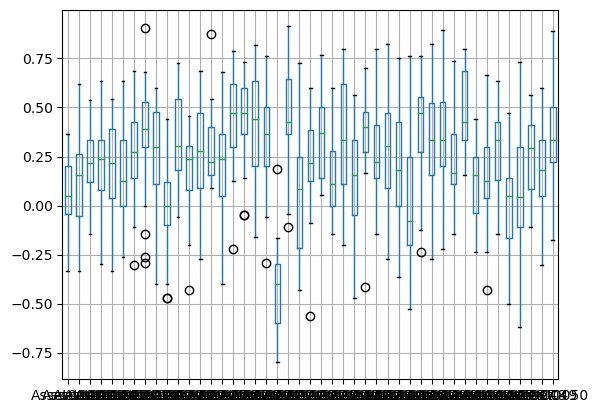

In [ ]:
%matplotlib inline

vi=pd.read_csv('vi_table.csv')
vi_df=vi.reindex(vi.columns[vi.columns.str.contains('Asset')],axis=1)
vi_df.boxplot()

<AxesSubplot: >

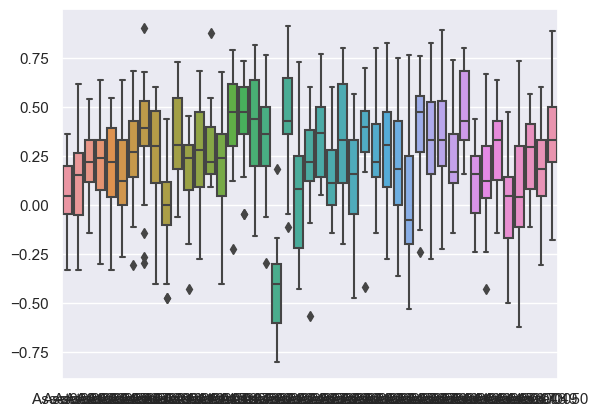

In [ ]:
import seaborn as sns
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.boxplot(data=vi_df)

c:\Users\arturoV\AppData\Local\miniconda3\envs\analysis\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot: >

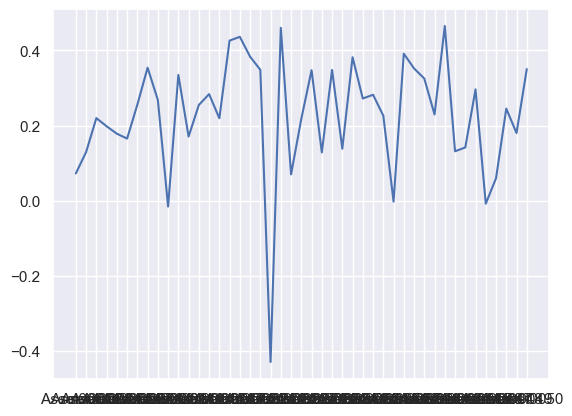

In [ ]:
sns.set_theme(style='darkgrid')
ax, fig=plt.subplots(1,)
sns.lineplot(data=np.mean(vi_df))

### Adding chrono tables

In [ ]:
chrono_df= (pd.read_csv('chrono.csv',delimiter=';',usecols=['Chrono_ID','Begin_date','End_date'])
            .assign(final_date= lambda x: (x.Begin_date+x.End_date)/2))
chrono_df.head()

,Chrono_ID,Begin_date,End_date,final_date
0,Chrono0001,-5500,-5000,-5250.0
1,Chrono0002,-5000,-4400,-4700.0
2,Chrono0003,-4400,-3500,-3950.0
3,Chrono0004,-3500,-2800,-3150.0
4,Chrono0005,-2800,-2200,-2500.0


In [ ]:
asset_df=pd.read_csv('asset.csv',delimiter=';',usecols=['Asset_ID','Chrono_ID']).merge(chrono_df,on='Chrono_ID')
asset_df.head()

,Asset_ID,Chrono_ID,Begin_date,End_date,final_date
0,Asset0001,Chrono0019,-5500,-5250,-5375.0
1,Asset0002,Chrono0020,-5250,-4950,-5100.0
2,Asset0003,Chrono0020,-5250,-4950,-5100.0
3,Asset0004,Chrono0020,-5250,-4950,-5100.0
4,Asset0005,Chrono0021,-5000,-4600,-4800.0


In [ ]:
vi_df_med=vi_df.median(axis=0).to_frame().reset_index()
vi_df_med.columns=['Asset_ID','vi']
vi_df_med.head()

,Asset_ID,vi
0,Asset0001,0.047619
1,Asset0002,0.153846
2,Asset0003,0.217391
3,Asset0004,0.238095
4,Asset0005,0.217391


In [ ]:
asset_time_df=(vi_df_med.merge(asset_df,on='Asset_ID')
               .sort_values(by='final_date',ascending=True)
               #.query('final_date<-3000')
               )



In [ ]:
asset_time_df

,Asset_ID,vi,Chrono_ID,Begin_date,End_date,final_date
0,Asset0001,0.047619,Chrono0019,-5500,-5250,-5375.0
1,Asset0002,0.153846,Chrono0020,-5250,-4950,-5100.0
2,Asset0003,0.217391,Chrono0020,-5250,-4950,-5100.0
3,Asset0004,0.238095,Chrono0020,-5250,-4950,-5100.0
4,Asset0005,0.217391,Chrono0021,-5000,-4600,-4800.0
5,Asset0006,0.125000,Chrono0022,-4600,-4450,-4525.0
6,Asset0007,0.272727,Chrono0023,-4450,-4000,-4225.0
7,Asset0008,0.391304,Chrono0023,-4450,-4000,-4225.0
8,Asset0009,0.300000,Chrono0025,-4000,-3500,-3750.0
9,Asset0010,0.000000,Chrono0025,-4000,-3500,-3750.0


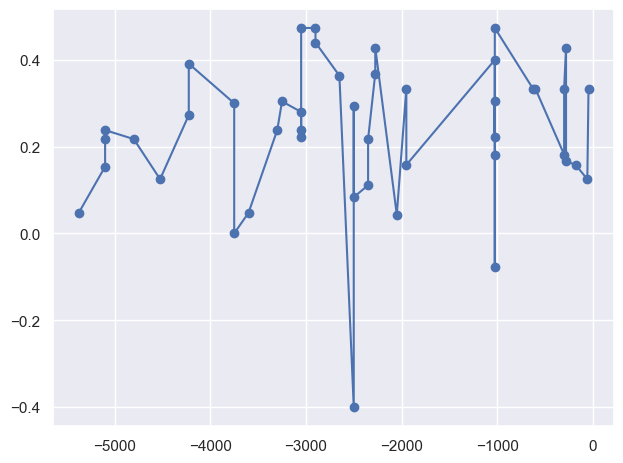

In [ ]:
fig,ax=plt.subplots(1,)
ax.plot(asset_time_df['final_date'],asset_time_df['vi'],'-o')
fig.tight_layout()